### Model Complexity and Evaluation



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Polynomial Models

Thus far, our regression models have taken the form:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_ix_i$$

where all our inputs to the model were linear.  


In this notebook, we consider models of the form:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + ... + \beta_ix_1^i$$

These are commonly referred to as *Polynomial Regression Models* -- however we are still using Linear Regression because the unknown quantities -- $\beta$ -- are linear.

In [2]:
#load in the cars data
cars = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/main/data/mtcars.csv')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

In [25]:
cars.head(2)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [26]:
#x = mpg and y = hp
X = cars[['mpg']]
y = cars['hp']

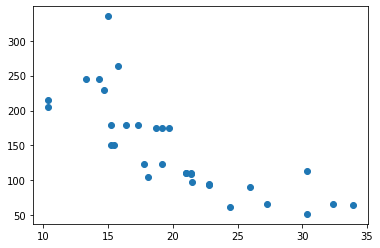

In [27]:
#scatter plot of x vs. y
plt.scatter(X, y)

### Reminder on Least Squares

$$f(m, b) = \sum_{i = 1}^n (y_i - (mx_i + b))^2$$

**Assumptions of the model**

- The relationship between features and target are linear in nature
- The features are independent of one another
- The errors are normally distributed
- The residuals have constant variance across all feature values

In [28]:
#fit model
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

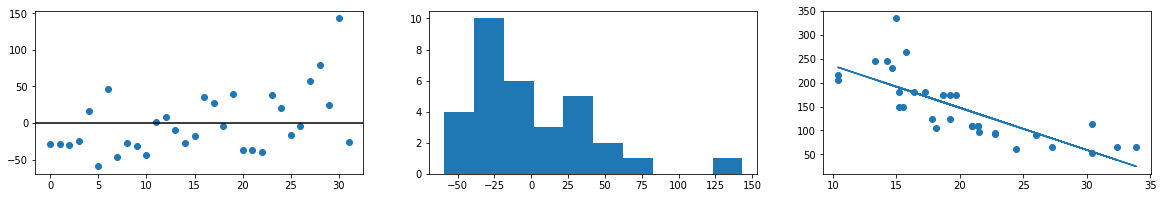

In [29]:
#plot residuals
resids = (y - preds)

fig, ax = plt.subplots(1, 3, figsize = (20, 3))

ax[0].plot(resids, 'o')
ax[0].axhline(color = 'black')
ax[1].hist(resids)
ax[2].scatter(X['mpg'], y)
ax[2].plot(X['mpg'], lr.predict(X))

In [30]:
#Any assumptions violated?  Why?

### Reminder: Quadratics

$$f(x) = ax^2 + bx + c$$


$$f(a, b, c) = \frac{1}{n}\sum_{i = 1}^n (y_i - (ax_i^2 + bx_i + c))^2$$

In plain language, we add a new feature to represent the quadratic term and fit a linear regressor to these columns, essentially what we've done with multiple regression.

In [31]:
#examine X
X.head()

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


In [32]:
#add new feature
X['mpg^2'] = X['mpg']**2

<ipython-input-32-6eb7e30e5d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg^2'] = X['mpg']**2


In [33]:
# check X again
X.head(2)

,mpg,mpg^2
0,21.0,441.0
1,21.0,441.0


In [34]:
#fit model and look at coefficients
model1 = LinearRegression().fit(X, y)
model1.coef_

array([-23.34451763,   0.33002884])

In [35]:
# intercept
model1.intercept_

470.86947158376057

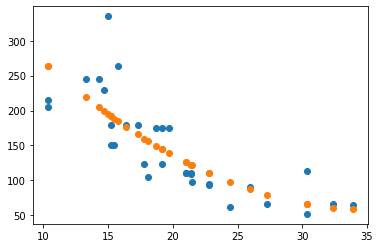

In [36]:
plt.scatter(X['mpg'], y)
plt.scatter(X['mpg'], model1.predict(X))

In [37]:
# mean squared error?
mean_squared_error(y, model1.predict(X))

1623.1102840474189

**QUESTION**: Which is better -- the first or second degree model?

### Problem

1. Add a cubic term to the data.  
2. Fit a new model to the cubic data.
3. Determine the `mean_squared_error` of the linear, quadratic, and cubic models.  How do they compare?
4. Would a quartic polynomial (4th degree) be better or worse in terms of `mean_squared_error`?


In [38]:
X.loc[:, 'mpg^3'] = X['mpg']**3
lr3 = LinearRegression().fit(X, y)
print(f'MSE for degree 3: {mean_squared_error(y, lr3.predict(X))}')

MSE for degree 3: 1423.58061688618


<ipython-input-38-08c592816a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'mpg^3'] = X['mpg']**3


In [39]:
X.loc[:, 'mpg^4'] = X['mpg']**4
lr4 = LinearRegression().fit(X, y)
print(f'MSE for degree 4: {mean_squared_error(y, lr4.predict(X))}')

MSE for degree 4: 1216.1757673576178


<ipython-input-39-2eb0278d1a36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'mpg^4'] = X['mpg']**4


### Experimenting with complexity

Below, a synthetic dataset is created and different complexity regression models can be controlled using the slider.  Which degree complexity seems best?  Consider the new data after you determine the ideal model.

In [40]:
from ipywidgets import interact
import ipywidgets as widgets

In [41]:
x = np.linspace(0, 12, 30)
y = 3*x + 15 + 4*np.sin(x) + np.random.normal(scale = 3.0, size = len(x))

In [42]:
# Don't Peek!
# x = np.random.choice(x, 50, replace = False)
def model_maker(n, newdata = False):
    coefs = np.polyfit(x, y, n)
    preds = np.polyval(coefs, x)
    x_,y_,p_ = zip(*sorted(zip(x, y, preds)))
    plt.scatter(x_, y_, label = 'Known Data')
    plt.xlim(0, 6)
    if newdata:
        np.random.seed(42)
        x2 = np.random.choice(np.linspace(0, 12, 1000), 35)
        y2 = 3*x2 + 15 + 4*np.sin(x2) + np.random.normal(scale = 3.0, size = len(x2))
        plt.scatter(x2, y2, label = 'New Data')
    plt.plot(x_, p_, color = 'red')
    plt.title(f'Degree {n}')
    plt.legend();

In [43]:
interact(model_maker, n = widgets.IntSlider(start = 1, min = 1, max = len(y), step = 1));

interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Checkbox(value=False, description='n…

In [ ]:
#CHOOSE OPTIMAL COMPLEXITY

`PolynomialFeatures`

Scikitlearn has a transformer that will do the work of adding polynomial terms on to our dataset.  For more information see the documentation [here](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features).

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
#create a little dataset (3, 2)
toy_x = np.random.normal(size = (3, 2))
toy_x

array([[0.02550067, 0.47319325],
       [0.6591906 , 2.34074633],
       [1.07098519, 0.09641648]])

In [46]:
#instantiate and transform
poly_feats = PolynomialFeatures(include_bias = False)
poly_feats.fit_transform(toy_x)

array([[2.55006681e-02, 4.73193249e-01, 6.50284073e-04, 1.20667440e-02,
        2.23911851e-01],
       [6.59190598e-01, 2.34074633e+00, 4.34532245e-01, 1.54299798e+00,
        5.47909340e+00],
       [1.07098519e+00, 9.64164790e-02, 1.14700927e+00, 1.03260621e-01,
        9.29613743e-03]])

`interaction_only = True`

In [47]:
#look at the feature names
poly_feats.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [48]:
#create a dataframe from results
pd.DataFrame(poly_feats.fit_transform(toy_x), columns = poly_feats.get_feature_names_out())

,x0,x1,x0^2,x0 x1,x1^2
0,0.025501,0.473193,0.000650,0.012067,0.223912
1,0.659191,2.340746,0.434532,1.542998,5.479093
2,1.070985,0.096416,1.147009,0.103261,0.009296


Now, let's use `PolynomialFeatures` to solve the earlier problem predicting `hp` using `mpg`. 

In [49]:
#instantiate polynomial features
pfeats = PolynomialFeatures(include_bias=False)

In [50]:
#transform X
XT = pfeats.fit_transform(X[['mpg']])

In [51]:
XT.shape

(32, 2)

In [52]:
#examine feature names
pfeats.get_feature_names_out()

array(['mpg', 'mpg^2'], dtype=object)

In [53]:
#instantiate model
lr5 = LinearRegression().fit(XT, cars['hp'])

In [54]:
#fit, predict and score
mean_squared_error(cars['hp'], lr5.predict(XT))

1623.1102840474193

#### `train_test_split`



To this point, we have evaluated our models using the data they were built with.  If our goal is to use these models for future predictions, it would be better to understand the performance on data the model has *not* seen in the past.  To mimic this notion of unseen data, we create a small holdout set of data to use in evaluation.  

- **Train Data**: Data to build our model with.
- **Test Data**: Data to evaluate the model with (usually a smaller dataset than train)

Scikitlearn has a `train_test_split` function that will create these datasets for us.  Below we load it from the `model_selection` module and explore its functionality. [User Guide](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [55]:
# import function
from sklearn.model_selection import train_test_split

In [56]:
# create a train and test split
y = cars['hp']
X_train, X_test, y_train, y_test = train_test_split(XT, y, random_state=42)

In [57]:
# explore train data
X_train.shape

(24, 2)

In [58]:
# explore test data
X_test.shape

(8, 2)

In [59]:
# build model with train
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
# evaluate train mse
train_preds = lr.predict(X_train) 
print(mean_squared_error(y_train, train_preds))

1076.664148967975


In [61]:
# evaluate test mse
test_preds = lr.predict(X_test)
print(mean_squared_error(y_test, test_preds))

3424.62590870615


#### Using the test data to determine model complexity

Now, you can use the test set to measure the performance of models with varied complexity -- choosing the "best" based on the scores on the test data.

In [62]:
# create polynomial features for train and test
for i in range(1, 10):
    poly_feats = PolynomialFeatures(degree = i, include_bias = False)
    X_train_poly = poly_feats.fit_transform(X_train)
    X_test_poly = poly_feats.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    train_preds = lr.predict(X_train_poly)
    test_preds = lr.predict(X_test_poly)
    print(f'Train MSE: {mean_squared_error(y_train, train_preds)}')
    print(f'Test MSE: {mean_squared_error(y_test, test_preds)}')
    print('--------------------------------')


Train MSE: 1076.664148967975
Test MSE: 3424.62590870615
--------------------------------
Train MSE: 819.6896362278408
Test MSE: 2740.5076094450405
--------------------------------
Train MSE: 779.1116137946063
Test MSE: 2783.3566973521306
--------------------------------
Train MSE: 757.0893108145816
Test MSE: 3493.6718997265625
--------------------------------
Train MSE: 750.5233233919222
Test MSE: 12821.629881401424
--------------------------------
Train MSE: 757.0737985148033
Test MSE: 76165.11071392534
--------------------------------
Train MSE: 775.4900345505683
Test MSE: 450722.28290456336
--------------------------------
Train MSE: 797.4142544345755
Test MSE: 2529984.0308952453
--------------------------------
Train MSE: 814.1223225548125
Test MSE: 9191706.393489875
--------------------------------


In [ ]:
# fit the model


In [ ]:
# train MSE


In [ ]:
# test MSE


### Part II

#### Another Example

Returning to the credit dataset from earlier, we walk through a basic model building exercise.  Along the way we will explore the `OneHotEncoder` and `make_column_transformer` to help with preparing the data for modeling.  Our workflow is as follows:

- Convert categorical columns to dummy encoded
- Add polynomial features
- Build `LinearRegression` model on train data
- Evaluate on test data

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [66]:
# load data
url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/main/data/Credit.csv'
credit = pd.read_csv(url, index_col = 0)

In [67]:
# train/test split
credit.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [72]:
# import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse = False)

In [77]:
# instantiate
X_train, X_test, y_train, y_test = train_test_split(credit[['Ethnicity', 'Limit', 'Student']], credit['Balance'])

In [78]:
# fit and transform train data
XT = ohe.fit_transform(X_train)
# print(XT)

In [80]:
# instead we specify columns with make_column_selector
selector = make_column_transformer((OneHotEncoder(drop = 'first'), ['Ethnicity', 'Student']),
                                  remainder = 'passthrough')

In [84]:
# transform train and test
XTR = selector.fit_transform(X_train)
XTS = selector.transform(X_test)

In [85]:
XTR

array([[0.000e+00, 0.000e+00, 0.000e+00, 7.667e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.300e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 8.550e+02],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, 5.673e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 2.586e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 1.852e+03]])

In [86]:
# add polynomial features
pfeats = PolynomialFeatures()
XTRP = pfeats.fit_transform(XTR)
XTRS = pfeats.transform(XTS)

In [87]:
# fit regression model
lr6 = LinearRegression().fit(XTRP, y_train)

In [88]:
# score on train
mean_squared_error(y_train, lr6.predict(XTRP))

36590.5031371065

In [89]:
# score on test
mean_squared_error(y_test, lr6.predict(XTRS))

44795.84838827427

### A Larger Experiment

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
#sample data
X, y = make_regression(n_features = 4, n_samples = 1000, n_informative = 2)

In [ ]:
data = pd.DataFrame(X, columns = ['x1', 'x2', 'x3', 'x4'])
data['y'] = y

In [ ]:
data.head()

Now, we want to explore the effect of different complexities on the error of the model.  Your goal is to explore Linear Regression model complexities of degree 1 through 15 on a train and test set of data above.  

In [ ]:
#create train and test data


In [ ]:
#empty lists to hold train and test rmse


In [ ]:
#loop over 15 complexities

##instantiate polynomial transformer

##transform

##instantiate regressor

##fit

##append train and test rmse

#plot model complexity vs. rmse for both train and test
